# Data Visualization and Modeling: Olympic history

In this notebook, I practiced the techniques that I learnt during the Udemy course Python for Data Science and Machine Learning Bootcamp by Jose Portilla (Pierian Data International).

I found an interesting looking Kaggle dataset: 120 years of Olympic history
https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

From the description on Kaggle: "This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018."

Things that I chose to explore in this dataset:
- changes in participation over time M/F, Team, Age, Sport
- predictor of sport given physical features (Sex, Age, Weight, Height) -> what sport should you do, given your physical features

### Import packages and load data

First, import packages for visualisations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load dataset from datasets folder, and have a look at the information

In [2]:
df = pd.read_csv('datasets/olympics/athlete_events.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Note that there are null entries in age, height, weight, and medal, but all other columns are complete.
This is expected for medal, since only a small proportion of those entered in each event will win a medal.
For age, height, and weight, this is simply missing data.

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Things to note from the head:
- Can see some missing height and weight is likely because this was not recorded for competitors from early modern olympics (1900, 1920).
- Some sports and events from early modern olympics are no longer included in the current olympics (Tug-Of-War in 1900).
- Sport is general, there may be many events to a sport.
- Team and NOC may not directly match e.g. Denmark/Sweden -> DEN

### Explore the dataset

First query: how many competitors were there in each year? Has the number of competitors increased over time?

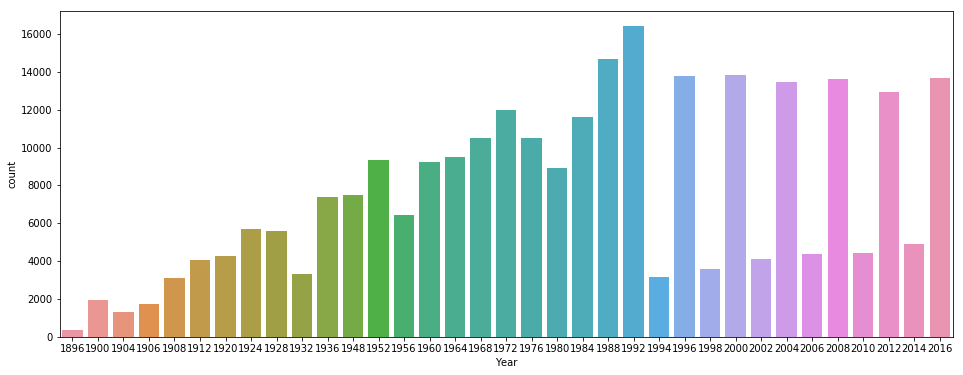

In [4]:
year = df['Year'].value_counts()
plt.figure(figsize=(16,6))
sns.countplot(x='Year', data=df)

Notes on figure:
- We can see that until 1992, number of competitors per year increases every year, with a few exceptions (likely reasons: war, boycotts).
- Can also see the chage after 1992, in that the winter and summer games were no longer held in the same year.
- The number of competitors for the summer games seems to have leveled off, while the winter games is still increasing.
- Do another figure to separate out winter and summer games:

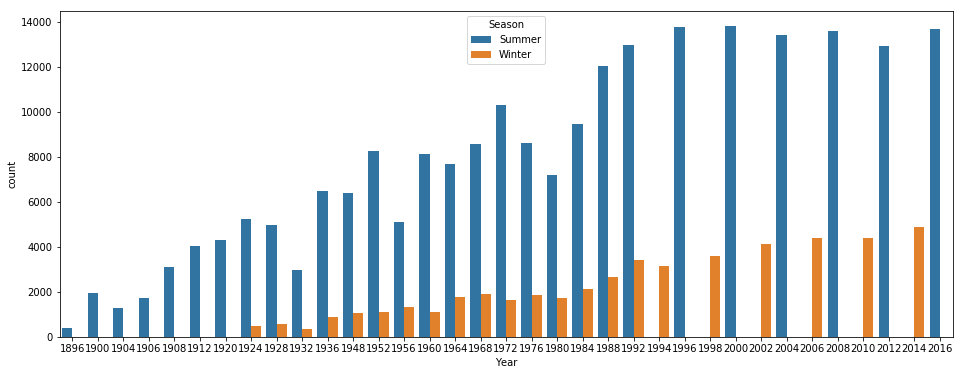

In [5]:
plt.figure(figsize=(16,6))
sns.countplot(x='Year', data=df, hue='Season')

From this figure, we can see clearly that the participation at the winter games is still increasing, while participation for the summer games levels out from 1996 onwards.

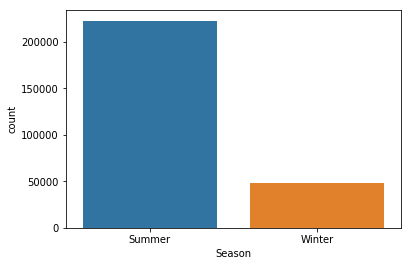

In [6]:
sns.countplot(x='Season',data=df)

There are a lot more competitors in this dataset for the summer games

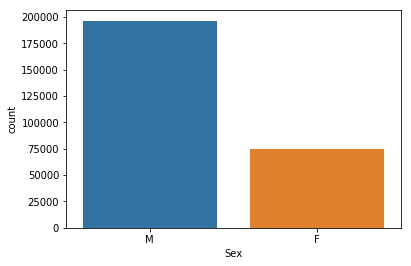

In [7]:
sns.countplot(x='Sex',data=df)

Also, a lot more male competitors than female competitors

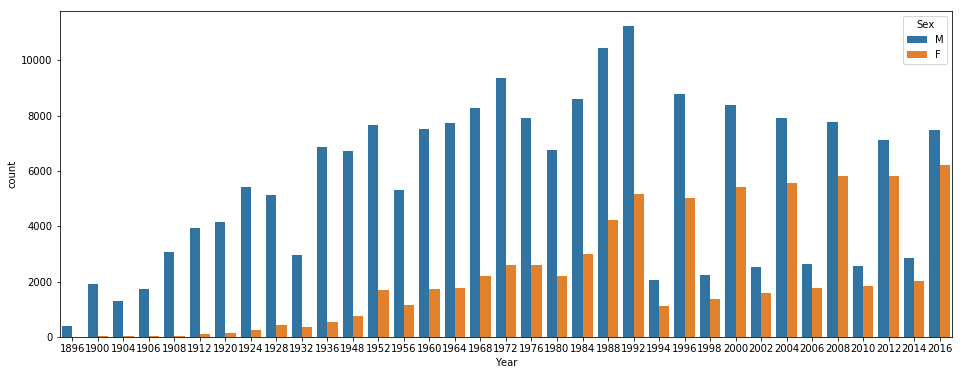

In [8]:
plt.figure(figsize=(16,6))
sns.countplot(x='Year', data=df, hue='Sex')

But this difference is reducing, in fact number of male competitors has decreased since 1992, while number of femal competitors is still increasing

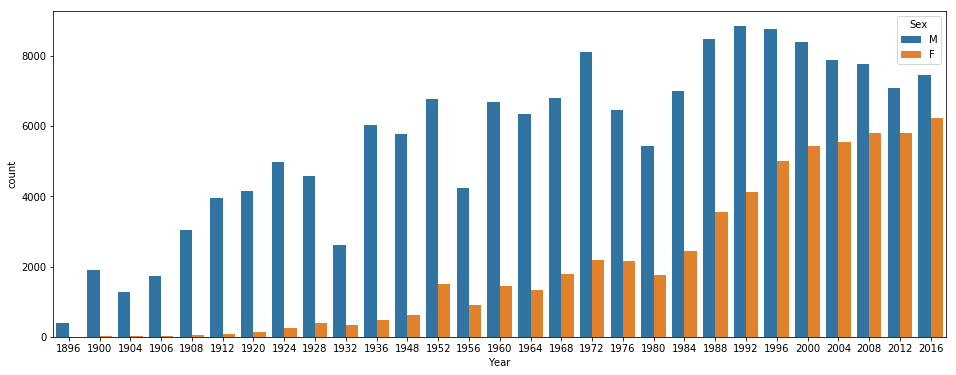

In [9]:
plt.figure(figsize=(16,6))
sns.countplot(x='Year', data=df[df['Season']=='Summer'], hue='Sex')

Same as the above plot, without the winter competitors, shows the recent trends more clearly for the summer games

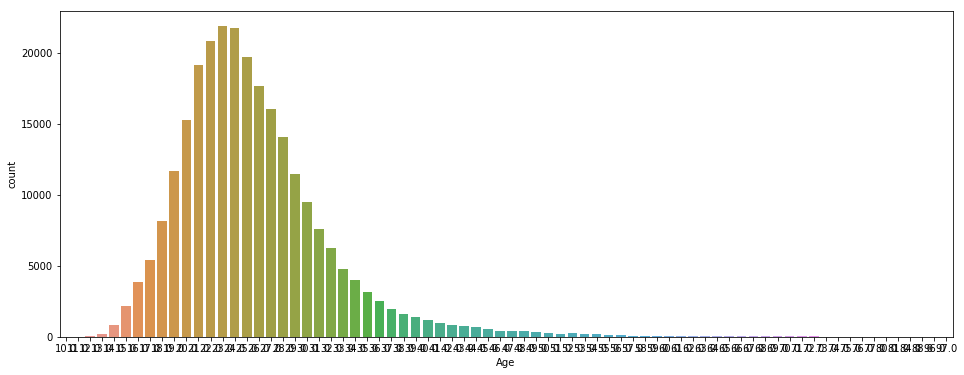

In [10]:
plt.figure(figsize=(16,6))
sns.countplot(x='Age',data=df)

Typical age for competitor at the olympics is mid-20s, although ranges from 10 to 97

In [11]:
max(df['Age'])

97.0

In [12]:
min(df['Age'])

10.0

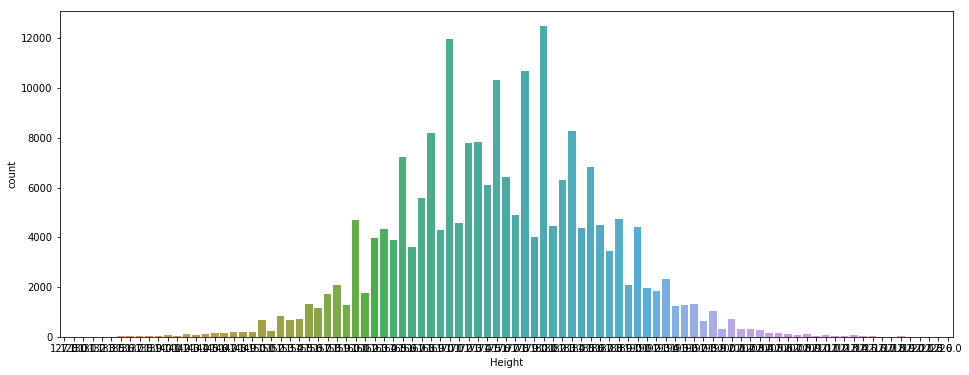

In [13]:
plt.figure(figsize=(16,6))
sns.countplot(x='Height',data=df)

In [14]:
min(df['Height'])

127.0

In [15]:
max(df['Height'])

226.0

Large range for height, from 127cm to 226cm, with most in the middle of this range

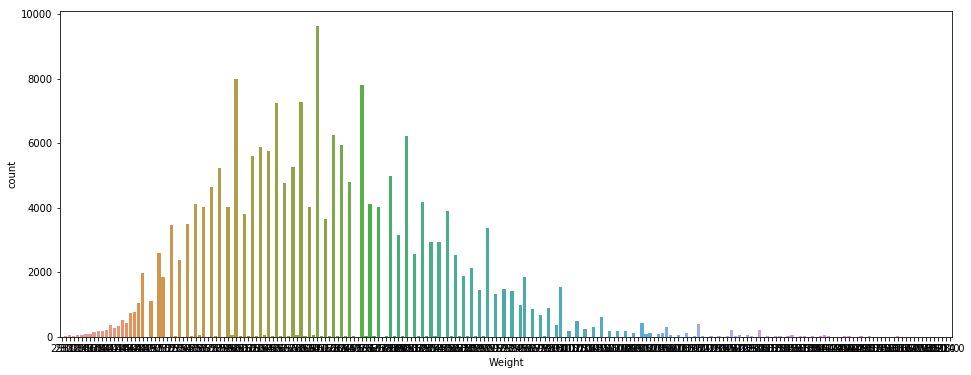

In [16]:
plt.figure(figsize=(16,6))
sns.countplot(x='Weight',data=df)

In [17]:
min(df['Weight'])

25.0

In [18]:
max(df['Weight'])

214.0

Also large range for weight, from 25kg to 214kg.

Now to do a pariplot of the dataset, to see if there are any obvious trends to look at:

C:\Users\admin\Miniconda3\envs\p35\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\admin\Miniconda3\envs\p35\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


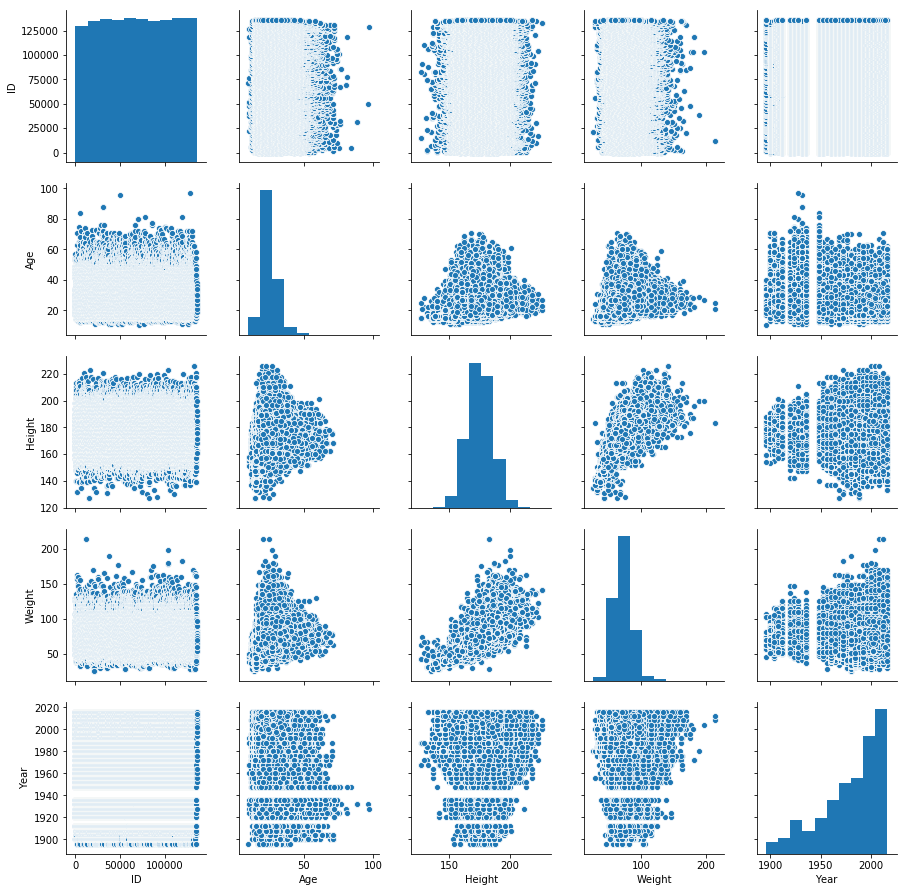

In [19]:
sns.pairplot(df)

Notes from the pair plot:
- ID is obviously not a relevant variable to find any trends with
- Year bar plot - more competitors pretty much every year (group of years in this case), with exception of the missing olympic years
- Age - there appear to be some odd outliers from earlier olympics, prior to ~1950 
- note that there is no weight and height information for anyone over about 70
- Height vs weight shows expected correspondence, generally shorter and lighter, taller and heavier (would be interesting to compare to a general population dataset)
- Weight vs age - younger competitors also lightest competitors, heaviest competitors are ~20, older competitors are ~50 to 80kg
- Height vs age - younger competitors are shorter, tallest competitors are ~20, older competitors are average height
- differences in height, weight, age over time are actually less pronounced than I was expecting, possibly because there are so many different sports, so there is a wide selection of competitors, trend over time is simply to include more competitors at the extremes (taller, shorter, heavier, and lighter)

In [20]:
df['Sport'].value_counts().head()

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: Sport, dtype: int64

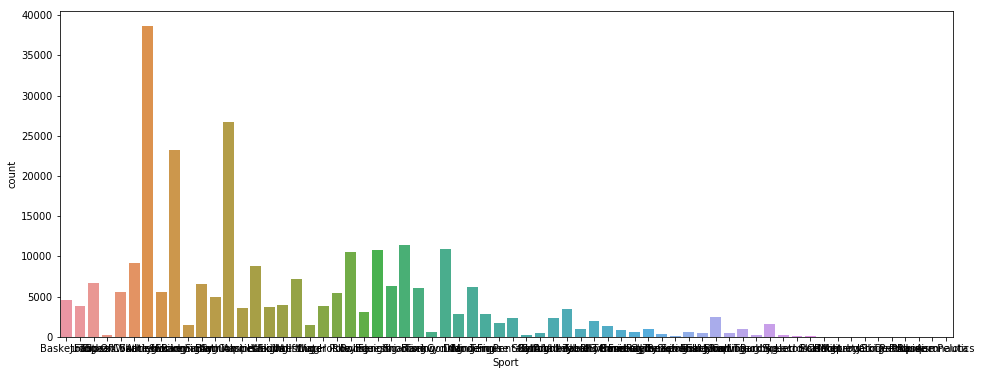

In [21]:
plt.figure(figsize=(16,6))
sns.countplot(x='Sport',data=df)

There are some vary large sports, note that athletics is made up of many different events, as are some of the other sports.

In [22]:
df['Event'].value_counts().head()

Football Men's Football        5733
Ice Hockey Men's Ice Hockey    4762
Hockey Men's Hockey            3958
Water Polo Men's Water Polo    3358
Basketball Men's Basketball    3280
Name: Event, dtype: int64

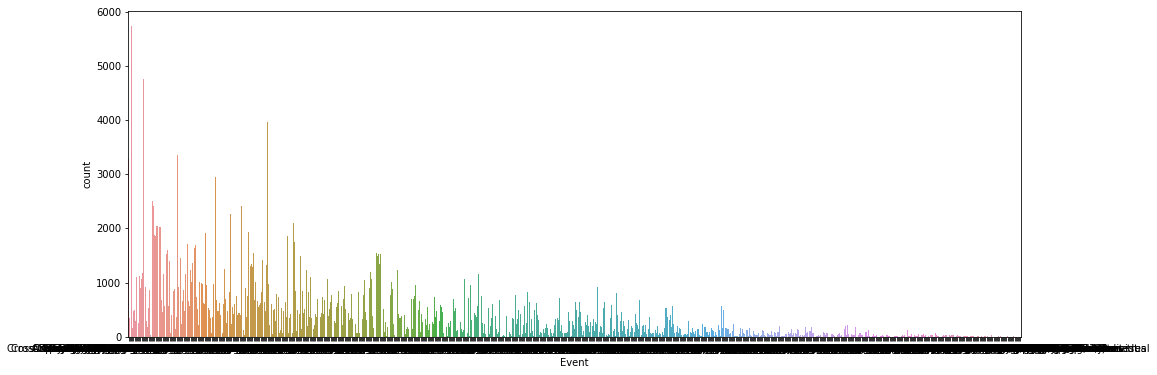

In [23]:
plt.figure(figsize=(16,6))
sns.countplot(x='Event',data=df)

The largest events are the team events. There are a lot of different events...

In [24]:
df[df['Year']<1920]['Sport'].value_counts()

Athletics            2751
Shooting             1844
Gymnastics           1505
Fencing              1140
Cycling               843
Rowing                663
Swimming              642
Sailing               453
Tennis                432
Wrestling             395
Football              351
Equestrianism         207
Archery               179
Diving                162
Water Polo            147
Tug-Of-War            130
Golf                  127
Rugby                  77
Hockey                 68
Boxing                 66
Lacrosse               60
Weightlifting          39
Art Competitions       33
Polo                   33
Modern Pentathlon      32
Cricket                24
Figure Skating         23
Croquet                19
Motorboating           17
Racquets               12
Jeu De Paume           11
Roque                   4
Basque Pelota           2
Name: Sport, dtype: int64

There are some interesting events in the games earlier than 1920,
including: Basque Pelota, Roque, Jeu De Paume, Racqets, Art Competitions, Tug-Of-War.

#### Art Competitions

In [25]:
df[df['Sport']=='Art Competitions']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
58,19,Win Valdemar Aaltonen,M,54.0,NaN,NaN,Finland,FIN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
669,389,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
670,389,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
1203,677,Georges Achille-Fould,F,55.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Painting,NaN
1251,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
1374,776,Paul Adam,M,49.0,NaN,NaN,France,FRA,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Literature,NaN
1522,842,Wayman Elbridge Adams,M,48.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
2392,1337,Olof Ahlberg,M,71.0,NaN,NaN,Sweden,SWE,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
2709,1510,Anna Airy (-Pocock),F,45.0,NaN,NaN,Great Britain,GBR,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN


In [26]:
df[df['Sport']=='Art Competitions'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3578 entries, 58 to 271034
Data columns (total 15 columns):
ID        3578 non-null int64
Name      3578 non-null object
Sex       3578 non-null object
Age       3071 non-null float64
Height    59 non-null float64
Weight    55 non-null float64
Team      3578 non-null object
NOC       3578 non-null object
Games     3578 non-null object
Year      3578 non-null int64
Season    3578 non-null object
City      3578 non-null object
Sport     3578 non-null object
Event     3578 non-null object
Medal     156 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 447.2+ KB


In [27]:
max(df[df['Sport']=='Art Competitions']['Age'])

97.0

C:\Users\admin\Miniconda3\envs\p35\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\admin\Miniconda3\envs\p35\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


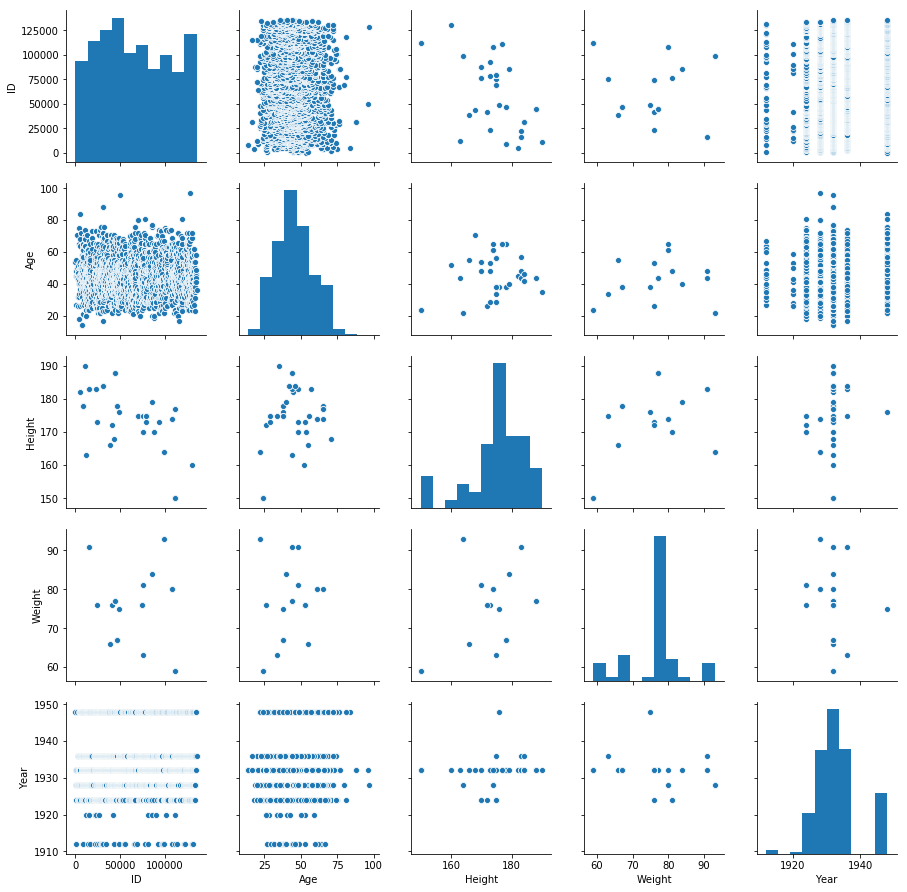

In [28]:
sns.pairplot(df[df['Sport']=='Art Competitions'])

Art Competitions 
- held until 1948
- very few of the competitors have a height or weight entered
- this sport includes the competitor that is 97 years old

#### Sports

In [29]:
df[(df['Season']=='Summer')&(df['Year']==2016)]['Sport'].value_counts()

Athletics                2508
Swimming                 1568
Gymnastics                861
Cycling                   667
Shooting                  555
Rowing                    550
Football                  473
Canoeing                  441
Hockey                    390
Judo                      389
Sailing                   380
Equestrianism             355
Handball                  353
Fencing                   346
Wrestling                 346
Rugby Sevens              299
Tennis                    286
Boxing                    283
Volleyball                283
Basketball                281
Water Polo                258
Weightlifting             255
Table Tennis              236
Archery                   200
Diving                    178
Badminton                 177
Taekwondo                 126
Golf                      120
Synchronized Swimming     118
Triathlon                 110
Rhythmic Gymnastics        96
Beach Volleyball           96
Modern Pentathlon          72
Trampolini

These are the 34 sports that were in the most recent summer games (2016), noting that athletics and Swimming are very large (>1000 competitors), and Trampolining, Modern Pentathlon, Beach Volleyball, and Rythmic Gymnastics are small (<100)

Also, regarding number of competitors, note that there are duplicate rows with respect to weight, height, sex, and age information for competitors in sports like Athletics, Swimming, Gymnastics, as individuals compete in multiple events in these sports

In [30]:
a = df[(df['Season']=='Summer')]['Sport'].value_counts()
allSports = list(a.keys())
len(allSports)

52

In [31]:
a = df[(df['Season']=='Summer')&(df['Year']>=2000)]['Sport'].value_counts()
modernSports = list(a.keys())
len(modernSports)

36

In [32]:
# To find a count of the number of times a sport has been included in the summer games
a = df[df['Season']=='Summer'].groupby(['Year'])['Sport'].value_counts()
yearIndex = 0
c = np.zeros(((int)((2020-1896) / 4),len(allSports)))
for year in range(1896,2020,4):
    if year in a:
        sportIndex = 0
        for sport in allSports:
            if (sport in a[year]):
                c[yearIndex][sportIndex] = a[year][sport]
            sportIndex = sportIndex + 1
    yearIndex = yearIndex + 1

<BarContainer object of 52 artists>

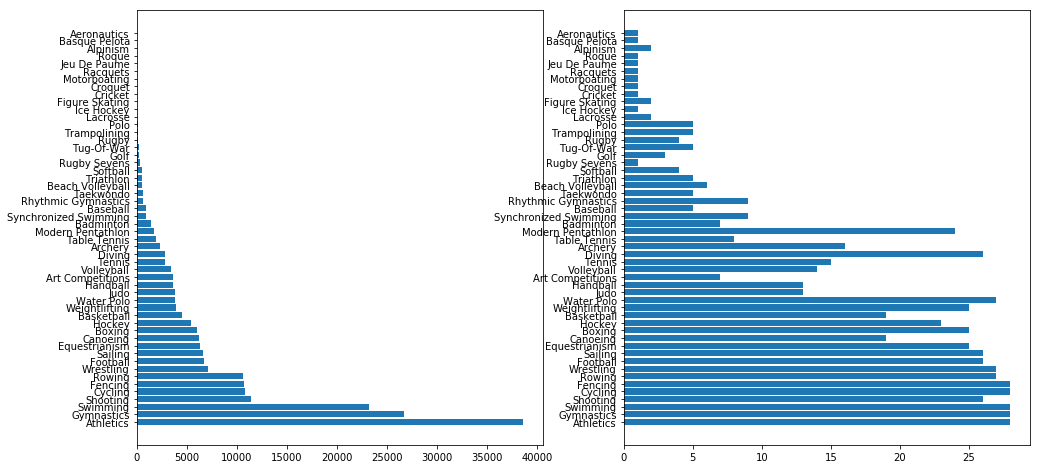

In [33]:
aa = df[(df['Season']=='Summer')]['Sport'].value_counts()
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.barh(allSports,aa.values)
plt.subplot(122)
plt.barh(allSports,sum(c>0))

The figure on the left shows the number of competitors for each sport over the whole dataset. The figure on the right shows the number of years in which a sport has been held.

Things to note:
- Modern Pentathlon, which has been held at 24 of the games, but has a small number of competitors each year.
- Several events in the modern list of events (Taekwondo, Baseball, Beach Volleyball) have only been held in a small number of games, and have small number of total competitors in the dataset
- Not every sport is held at every games, for example Baseball and Softball were not held in 2016, but are back on the program for 2020.
- There are 52 sports that have been held in the Summer games, of which 36 have been at games since 2000


### Model of the data

Now that I have explored the data, I propose to predict what event a competitor is in, given their height, weight, and age data.

It is unlikely that this will be able to be predicted with high accuracy, because there will be large overlap between the types of competitor in different sports. However, the top X sports for a given height, weight, age, may be fairly good indicator.

And this could be interesting information for someone: what sport would someone who is their height, weight, sex, age, likely to participate in at the olympics?

I propose to restrict data in the following ways:
- remove competitors for which there is no height, weight, age data (all other data is complete)
- restrict season to summer
- remove duplicate competitors that competed in multiple events in the same sport in the same year
- restrict the set of sports (see below)

I initially thought to restrict the year to after 1996, however, this reduces the number of data points significantly. Restricting the sports somehow, but including the earlier data should result in a better classifier.

To select a good set of sports to select over:
- Has been held in the last X games
- Has been held in at least Y games

Good values for X and Y are probably X=5 (since 2000), Y=5

It would also be possible to select for number of competitors, but the restriction to have been held in at least 5 years should already remove sports with too few competitors.

Process data so that it can be used in SVM, DT, and NN

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
df1 = df.dropna(subset=['Age', 'Height', 'Weight'])
df1 = df1[df1['Season'] == 'Summer']
df1 = df1.drop(columns=['ID', 'Team', 'Games', 'Season', 'City', 'NOC', 'Event', 'Medal'])
df1 = df1.drop_duplicates()
df1 = df1.drop(columns=['Name'])
le1 = LabelEncoder()
df1['Sex'] = le1.fit_transform(df1['Sex'])

In [36]:
aa = df1['Sport'].value_counts()
allSports1 = list(aa.keys())
len(allSports1)

43

In [37]:
a = df1.groupby(['Year'])['Sport'].value_counts()
yearIndex = 0
c = np.zeros(((int)((2020-1896) / 4),len(allSports1)))
for year in range(1896,2020,4):
    if year in a:
        sportIndex = 0
        for sport in allSports1:
            if (sport in a[year]):
                c[yearIndex][sportIndex] = a[year][sport]
            sportIndex = sportIndex + 1
    yearIndex = yearIndex + 1

<BarContainer object of 43 artists>

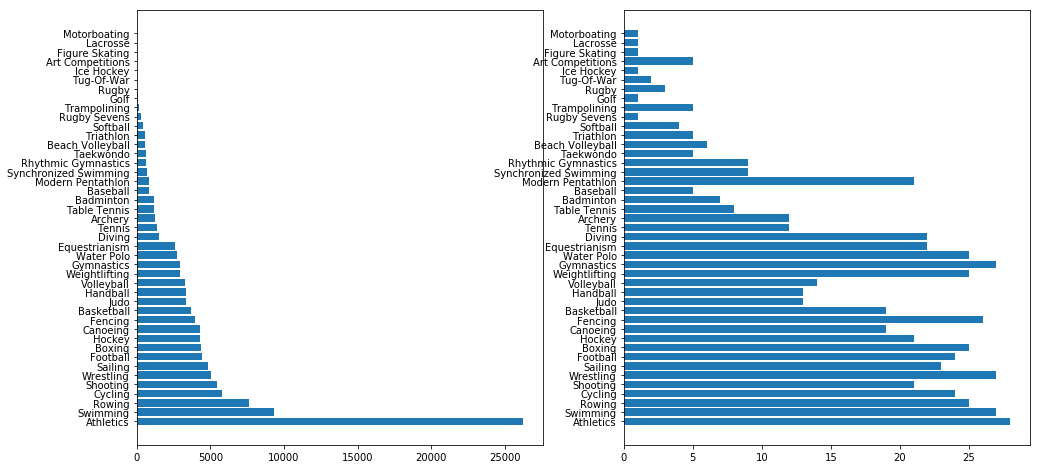

In [38]:
aa = df1['Sport'].value_counts()
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.barh(allSports1,aa.values)
plt.subplot(122)
plt.barh(allSports1,sum(c>0))

After taking out competitors with no age, weight, or height entered, there are now 43 sports.

In [39]:
chosenSports = modernSports
sportIndex = 0
for sport in allSports1:
    if sum(c>0)[sportIndex] < 5:
        if sport in chosenSports:
            chosenSports.remove(sport)
    sportIndex = sportIndex + 1
len(chosenSports)

33

After choosing sports that have been included in the games since 2000, and are in at least 5 games, there are now 33 different sports.

In [40]:
df1 = df1[df1['Sport'].isin(chosenSports)]
df1 = df1.drop(columns=['Year'])
sports = df1['Sport'].unique()
le2 = LabelEncoder()
df1['Sport'] = le2.fit_transform(df1['Sport'])

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121657 entries, 0 to 271110
Data columns (total 5 columns):
Sex       121657 non-null int32
Age       121657 non-null float64
Height    121657 non-null float64
Weight    121657 non-null float64
Sport     121657 non-null int32
dtypes: float64(3), int32(2)
memory usage: 4.6 MB


In [42]:
sports

array(['Basketball', 'Judo', 'Badminton', 'Sailing', 'Gymnastics',
       'Athletics', 'Weightlifting', 'Wrestling', 'Rowing', 'Swimming',
       'Football', 'Equestrianism', 'Shooting', 'Taekwondo', 'Boxing',
       'Fencing', 'Diving', 'Canoeing', 'Handball', 'Water Polo',
       'Tennis', 'Cycling', 'Hockey', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Modern Pentathlon', 'Table Tennis',
       'Baseball', 'Rhythmic Gymnastics', 'Trampolining',
       'Beach Volleyball', 'Triathlon'], dtype=object)

In [43]:
df1['Sport'].value_counts()

1     26270
22     9315
19     7601
8      5816
21     5451
32     5012
20     4860
12     4443
6      4363
7      4264
15     4264
11     3981
4      3668
16     3321
14     3319
29     3277
31     2968
13     2924
30     2719
10     2561
9      1513
26     1365
0      1243
24     1201
2      1149
3       846
17      834
23      685
18      615
25      596
5       538
28      526
27      149
Name: Sport, dtype: int64

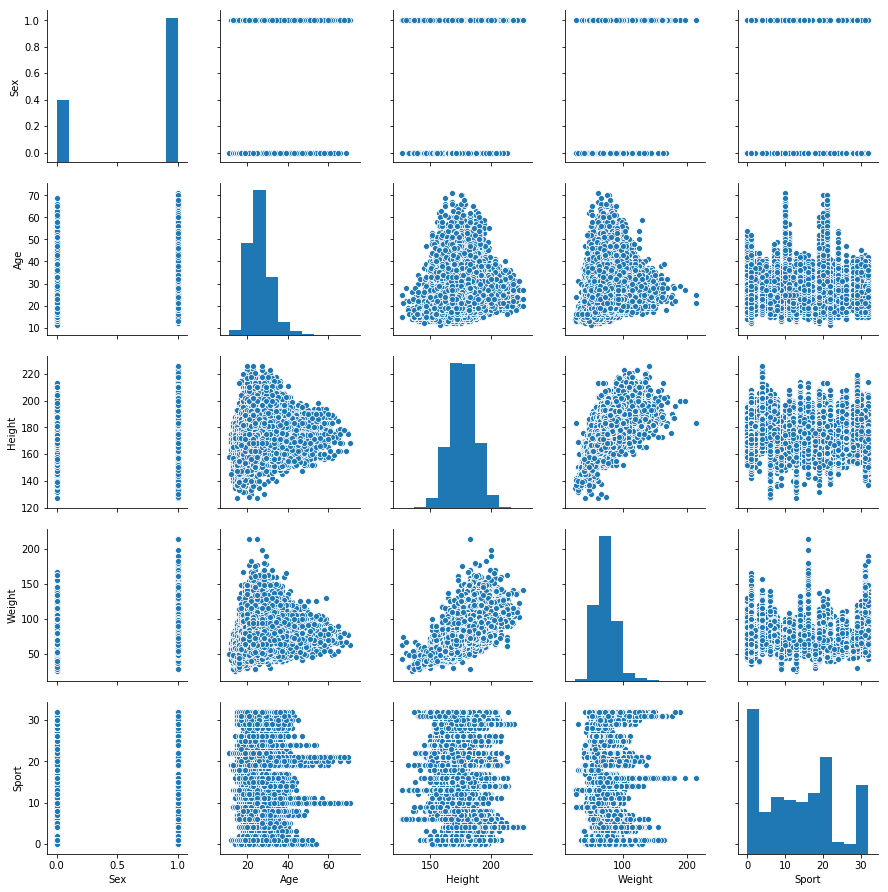

In [44]:
sns.pairplot(df1)

This pairplot shows that there are some trends between different sports, but there is also a very large overlap, particularly in the average age, height, and weight of competitors overall.

So, although it is unlikely that a classifier will do very well on this task (predict sport from sex, age, height, weight), here I will compare some standard techniques for predicting:
- decision trees
- support vector machines
- neural networks

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
# scale data so it can be used for neural networks, can also be used like this for the other techniques
from sklearn.preprocessing import StandardScaler
X = df1.drop(columns=['Sport'])
y = df1['Sport']
scaler = StandardScaler()
scaler.fit(X.values)
scaled_features = scaler.fit_transform(X.values)
df_feat = pd.DataFrame(scaled_features, columns=X.columns)
X1 = df_feat
y1 = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X1.values, y1.values, test_size=0.3)

In [47]:
# Support Vector Machine:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions_svc = svc_model.predict(X_test)
print(classification_report(y_test,predictions_svc))

C:\Users\admin\Miniconda3\envs\p35\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Miniconda3\envs\p35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       367
           1       0.28      0.85      0.42      7754
           2       0.00      0.00      0.00       350
           3       0.00      0.00      0.00       254
           4       0.51      0.26      0.34      1116
           5       0.00      0.00      0.00       153
           6       0.46      0.18      0.26      1316
           7       0.00      0.00      0.00      1260
           8       0.00      0.00      0.00      1792
           9       0.00      0.00      0.00       464
          10       0.44      0.18      0.26       753
          11       0.00      0.00      0.00      1199
          12       0.00      0.00      0.00      1340
          13       0.52      0.26      0.35       869
          14       0.26      0.01      0.02       960
          15       0.00      0.00      0.00      1295
          16       0.52      0.01      0.02      1028
          17       0.00    

C:\Users\admin\Miniconda3\envs\p35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Miniconda3\envs\p35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Miniconda3\envs\p35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVM reached average 24% precision, 31% recall, with a f1-score of 0.22. Also, it took a very long time to train.

In [48]:
#Decision tree:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions_dt = dtree.predict(X_test)
print(classification_report(y_test,predictions_dt))

              precision    recall  f1-score   support

           0       0.03      0.04      0.03       367
           1       0.31      0.53      0.39      7754
           2       0.01      0.01      0.01       350
           3       0.05      0.05      0.05       254
           4       0.25      0.29      0.27      1116
           5       0.02      0.03      0.02       153
           6       0.28      0.31      0.29      1316
           7       0.07      0.08      0.07      1260
           8       0.09      0.07      0.08      1792
           9       0.05      0.04      0.04       464
          10       0.19      0.17      0.18       753
          11       0.05      0.04      0.04      1199
          12       0.11      0.09      0.10      1340
          13       0.28      0.23      0.25       869
          14       0.10      0.09      0.10       960
          15       0.09      0.06      0.07      1295
          16       0.18      0.14      0.16      1028
          17       0.00    

Decision Tree reached average 21% precision, 23% recall, with a f1-score of 0.21. It was very quick to train.

In [49]:
# Neural network, several relu layers, finish with a softmax layer
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(40, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(chosenSports), activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
85159/85159 [==============================] - 7s 79us/step - loss: 2.6406 - acc: 0.2657
Epoch 2/10
85159/85159 [==============================] - 6s 66us/step - loss: 2.4437 - acc: 0.3018: 0s - loss: 2.4432 - acc: 0.
Epoch 3/10
85159/85159 [==============================] - 6s 71us/step - loss: 2.4089 - acc: 0.3085: 1s -
Epoch 4/10
85159/85159 [==============================] - 6s 68us/step - loss: 2.3947 - acc: 0.3096: 0s - loss: 2.3961 - ac
Epoch 5/10
85159/85159 [==============================] - 6s 65us/step - loss: 2.3881 - acc: 0.3108
Epoch 6/10
85159/85159 [==============================] - 5s 60us/step - loss: 2.3839 - acc: 0.3117
Epoch 7/10
85159/85159 [==============================] - 5s 62us/step - loss: 2.3811 - acc: 0.3125
Epoch 8/10
85159/85159 [==============================] - 5s 62us/step - loss: 2.3777 - acc: 0.3124
Epoch 9/10
85159/85159 [==============================] - 5s 62us/step - loss: 2.3760 - acc: 0.3119
Epoch 10/10
85159/85159 [================

In [51]:
train_loss, train_acc = model.evaluate(X_train, y_train)
print('Train accuracy: {:5.2f}'.format(100*train_acc))
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy: {:5.2f}'.format(100*test_acc))

85159/85159 [==============================] - 2s 25us/step
Train accuracy: 31.46
36498/36498 [==============================] - 1s 23us/step
Test accuracy: 30.80


In [52]:
predictions_nn = model.predict(X_test)
predictions_nn1 = np.argmax(predictions_nn, axis=1)
print(classification_report(y_test,predictions_nn1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       367
           1       0.30      0.79      0.43      7754
           2       0.00      0.00      0.00       350
           3       0.00      0.00      0.00       254
           4       0.38      0.34      0.36      1116
           5       0.00      0.00      0.00       153
           6       0.50      0.17      0.26      1316
           7       0.09      0.01      0.02      1260
           8       0.14      0.00      0.00      1792
           9       0.00      0.00      0.00       464
          10       0.40      0.18      0.24       753
          11       0.12      0.00      0.01      1199
          12       0.18      0.08      0.11      1340
          13       0.41      0.32      0.36       869
          14       0.19      0.04      0.07       960
          15       0.14      0.03      0.05      1295
          16       0.31      0.01      0.02      1028
          17       0.00    

C:\Users\admin\Miniconda3\envs\p35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Miniconda3\envs\p35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Miniconda3\envs\p35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
counts = np.zeros((len(chosenSports),), dtype=int)
i = 0
for prediction in predictions_nn:
    a = np.argsort(prediction)
    for j in range((len(chosenSports))):
        if y_test[i] == a[-(j+1)]:
            for c in range((len(chosenSports)-j)):
                counts[j+c] = counts[j+c]+1
    i = i+1
counts = counts / i
# accuracy for if target is included in top X suggested sports
print(counts)

[0.30804428 0.44854513 0.54460518 0.61595156 0.6725026  0.71768316
 0.75702778 0.78916653 0.81768864 0.84314209 0.86596526 0.88580196
 0.90232341 0.91761192 0.93021535 0.94191463 0.95183298 0.96029919
 0.96813524 0.97454655 0.9801085  0.9846019  0.98846512 0.99150638
 0.99421886 0.99632857 0.99767111 0.99852047 0.99934243 0.99972601
 0.9999452  0.9999726  1.        ]


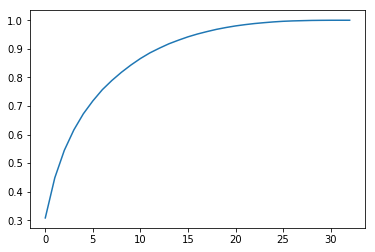

In [54]:
plt.plot(counts)

NN has a similar result to the SVM, but is quicker to train, and straightforward to convert to choosing the top X sports. With 5 sports, the correct sport is included 69% of the time, with 10 sports, the sport is included 86% of the time.

For the three models, here is a query for what sport is predicted for a given set of features. The values chosen for age, height, weight are close to the average +- 1*std (I didn't calculate this exactly, just looked at the figures above).

In [55]:
def sport_for_person(sex, age, height, weight, model_type):
    test = np.array([sex, age, height, weight], np.float64)
    test = test.reshape(1, -1)
    test1 = scaler.transform(test)
    toprint = ""
    if model_type == 'svc':
        prediction = svc_model.predict(test1)
        toprint = "[SVC] Suggested sport is: "
        toprint = toprint + sports[prediction]
        print(toprint[0])
    elif model_type == 'dt':
        prediction = dtree.predict(test1)
        toprint = "[DT] Suggested sport is: "
        toprint = toprint + sports[prediction]
        print(toprint[0])
    elif model_type == 'nn':
        prediction = model.predict(test1)
        a = np.argsort(prediction)
        toprint = "[NN] Suggested sports are: "
        for j in range(10):
            toprint = toprint + sports[a[0][-(j+1)]]
            if (j!=9):
                toprint = toprint + ', '
        print(toprint)

In [56]:
#sex: for male enter 1, for female enter 0
#age: in years
#height: in cm
#weight: in kg

sexes = [0, 1]
ages = [18, 24, 32]
heights = [150, 175, 200]
weights = [50, 80, 110]
for sex in sexes:
    for age in ages:
        for height in heights:
            for weight in weights:
                
                print('For a', age, 'year old', 'male' if sex else 'female', height, 'cm and', weight, 'kg:')
                sport_for_person(sex, age, height, weight,'svc')
                sport_for_person(sex, age, height, weight,'dt')
                sport_for_person(sex, age, height, weight,'nn')


For a 18 year old female 150 cm and 50 kg:
[SVC] Suggested sport is: Taekwondo
[DT] Suggested sport is: Hockey
[NN] Suggested sports are: Taekwondo, Swimming, Hockey, Judo, Beach Volleyball, Diving, Volleyball, Cycling, Shooting, Fencing
For a 18 year old female 150 cm and 80 kg:
[SVC] Suggested sport is: Beach Volleyball
[DT] Suggested sport is: Basketball
[NN] Suggested sports are: Beach Volleyball, Cycling, Diving, Judo, Triathlon, Basketball, Tennis, Rowing, Wrestling, Hockey
For a 18 year old female 150 cm and 110 kg:
[SVC] Suggested sport is: Beach Volleyball
[DT] Suggested sport is: Beach Volleyball
[NN] Suggested sports are: Beach Volleyball, Diving, Judo, Triathlon, Cycling, Basketball, Sailing, Tennis, Trampolining, Rowing
For a 18 year old female 175 cm and 50 kg:
[SVC] Suggested sport is: Handball
[DT] Suggested sport is: Handball
[NN] Suggested sports are: Handball, Judo, Hockey, Archery, Synchronized Swimming, Water Polo, Modern Pentathlon, Basketball, Volleyball, Equestr

[NN] Suggested sports are: Triathlon, Wrestling, Judo, Rowing, Fencing, Diving, Shooting, Cycling, Beach Volleyball, Tennis
For a 24 year old male 175 cm and 110 kg:
[SVC] Suggested sport is: Beach Volleyball
[DT] Suggested sport is: Diving
[NN] Suggested sports are: Beach Volleyball, Triathlon, Judo, Diving, Cycling, Sailing, Tennis, Basketball, Weightlifting, Rowing
For a 24 year old male 200 cm and 50 kg:
[SVC] Suggested sport is: Judo
[DT] Suggested sport is: Water Polo
[NN] Suggested sports are: Judo, Synchronized Swimming, Handball, Rowing, Water Polo, Football, Hockey, Weightlifting, Equestrianism, Tennis
For a 24 year old male 200 cm and 80 kg:
[SVC] Suggested sport is: Judo
[DT] Suggested sport is: Hockey
[NN] Suggested sports are: Judo, Gymnastics, Rhythmic Gymnastics, Hockey, Water Polo, Rowing, Equestrianism, Modern Pentathlon, Shooting, Tennis
For a 24 year old male 200 cm and 110 kg:
[SVC] Suggested sport is: Gymnastics
[DT] Suggested sport is: Boxing
[NN] Suggested sport

Predictions are made, but they are not necessarily sensible ones. There is probably some interesting dividing up of sex-age-height-weight space for the different sports that could be looked into.

### Conclusions
- This was a nice dataset to explore, some interesting trends over time with respect to participation. There is a lot more that could be explored with respect to information about age, height, and weight of competitors.
- The models constructed do pretty well, considering the overlapping nature of the categories. More could be done to tune these, but doing so would not guarantee a model that can accurately predict a sport or event given a competitors details, in part because for a given set of characteristics, there may be a wide range of appropriate sports.